# 1. 사진 준비하기

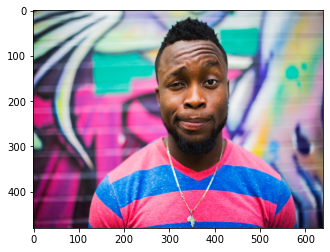

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_1.jpg'
img_bgr = cv2.imread(my_image_path)  # OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 480))    # Resize
img_show = img_bgr.copy()      # 출력용 이미지 별도 카피
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # RGB 이미지로 변경
plt.imshow(img_rgb)
plt.show()

# 2. Face Detection

rectangles[[(262, 98) (448, 284)]]


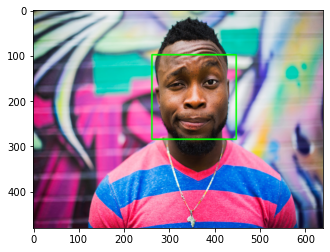

In [2]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   # dlib을 활용해 hog detector를 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # dlib은 rgb 이미지를 입력으로 받음
dlib_rects = detector_hog(img_rgb, 1)   # detector를 이용해서 얼굴의 bounding box를 추출

print(dlib_rects)   # 얼굴 영역 좌표 출력

# 이미지 위에 얼굴의 bounding box 출력
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 3. Face Landmark

In [3]:
# landmark 모델을 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark 개별 위치 저장
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))   # 68개의 (x,y) 튜플로 이루어진 리스트

68


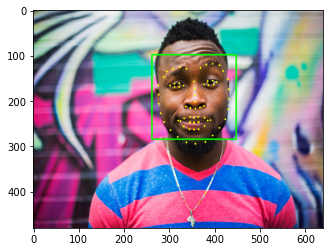

In [4]:
# 이미지에 landmark 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 4. 스티커 적용하기

## 4-1. 스티커 위치 및 크기 계산

In [5]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 중심점 좌표 확인(nose center index: 30)
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))  # 스티커의 위치 (x,y)
    print ('(w,h) : (%d,%d)'%(w,h))  # 스티커의 크기 (w,h)

(357, 202)
(x,y) : (357,202)
(w,h) : (187,187)


## 4-2. 스티커 resize & 좌표 조정

(187, 187, 3)


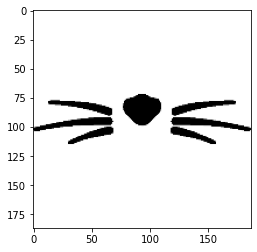

In [6]:
# 스티커 이미지를 읽어와 윗 단계에서 계산한 크기로 resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

plt.imshow(img_sticker)
plt.show()

In [7]:
# 이미지 시작점인 top-left 좌표로 x, y 좌표 변경
refined_x = x - w // 2  # left
refined_y = y - h // 2  # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (264,109)


## 4-3. 스티커 적용

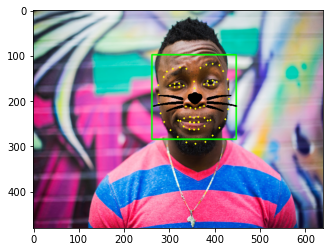

In [8]:
# 원본 이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

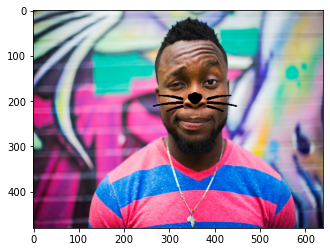

In [9]:
# bounding box와 landmark를 제거하고 최종 결과만 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))  # img_show 대신 아껴 두었던 img_rgb 사용
plt.show()

# 5. 다양한 이미지 테스트

rectangles[[(218, 184) (373, 339)]]


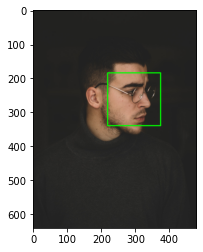

In [10]:
# 원본 이미지 불러오기
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image_17.jpg'
img_bgr = cv2.imread(my_image_path)  # OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (480, 640))    # Resize
img_show = img_bgr.copy()      # 출력용 이미지 별도 카피

# Face Detection
detector_hog = dlib.get_frontal_face_detector()   # dlib을 활용해 hog detector를 선언
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  # dlib은 rgb 이미지를 입력으로 받음
dlib_rects = detector_hog(img_rgb, 1)   # detector를 이용해서 얼굴의 bounding box를 추출

print(dlib_rects)   # 얼굴 영역 좌표 출력

# 이미지 위에 얼굴의 bounding box 출력
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

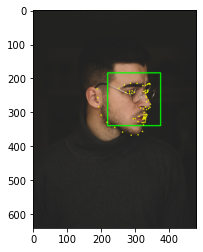

In [11]:
# landmark 모델 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

# landmark 개별 위치 저장
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

# 이미지에 landmark 출력
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [12]:
# 스티커 위치 및 크기 계산
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 중심점 좌표 확인(nose center index: 30)
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))  # 스티커의 위치 (x,y)
    print ('(w,h) : (%d,%d)'%(w,h))  # 스티커의 크기 (w,h)

# 스티커 이미지를 읽어와 윗 단계에서 계산한 크기로 resize
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))

# 이미지 시작점인 top-left 좌표로 x, y 좌표 변경
refined_x = x - w // 2  # left
refined_y = y - h // 2  # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(343, 276)
(x,y) : (343,276)
(w,h) : (156,156)
(x,y) : (265,198)


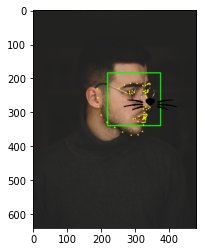

In [13]:
# 원본 이미지에 스티커 적용
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

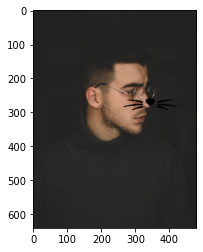

In [14]:
# bounding box와 landmark를 제거하고 최종 결과 출력
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

# 결과 이미지 출력
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))  # img_show 대신 img_rgb 사용
plt.show()

***
# 프로젝트 정리
### 스티커 적용 옵션
- **스티커 위치 및 좌표 설정**: 스티커의 고양이 코 부분이 원본 이미지의 사람 코 위치와 정확히 일치해야 하므로 코의 중심점 좌표인 `landmark[30]`을 기준으로 설정했다. 그리고 이미지의 시작점은 x에서 너비의 1/2만큼 뺀 값, y에서 높이의 1/2만큼 뺀 값으로 좌표를 재설정했다.
- **스티커 색상 반전**: 원본 이미지 위에 스티커를 붙였을 때 스티커 색상이 반전되는 문제가 있었다. 스티커 이미지를 불러온 후 따로 출력하면 정상적으로 보이지만, 원본 이미지에 적용하면 왠지 모르게 흰색 배경에 투명한 수염으로 바뀌었다. 이 문제는 `np.where(img_sticker==0,img_sticker,sticker_area)`처럼 sticker_area와 img_sticker의 순서를 바꾸니 해결되었다.

### 다양한 이미지에 적용해보기
- **멀리서 찍은 사진**: 얼굴이 작게 나온 사진에도 얼굴 크기에 맞는 아주 작은 크기로 스티커가 잘 적용되었다.
- **어두운 사진**: 어두운 사진은 경우에 따라 다른 듯하다. 아래 사진에서 왼쪽 사진은 눈이 잘 안보일 정도로 어둡지만 얼굴이 정면을 향하고 있어 인식이 잘 되었고, 오른쪽 사진은 이목구비는 잘 보이지만 얼굴 각도가 약간 아래를 향하고 있어 인식이 되지 않은 것 같다.
- **선글라스를 낀 사진**: 신기하게도 선글라스로 눈이 가려진 상태로도 얼굴이 인식되었다. 반투명 색안경뿐만 아니라 검은색 선글라스를 낀 사진에도 스티커가 잘 적용되었다.
- **다양한 각도의 사진**: 옆모습 사진, 얼굴이 기울어진 사진, 옆으로 누워있는 사진 등은 대부분 인식이 되지 않았다. 특히 하단의 세 번째 여자 사진은 이목구비가 분명하게 나왔는데도 의외로 인식이 되지 않았다. 반면 위의 테스트 예시로도 쓰인 첫 번째 남자 사진은 얼굴이 거의 한쪽 측면밖에 보이지 않는데도 인식이 잘 되었다. 추측하건대 첫 번째 사진은 배경과 얼굴의 명암 대비가 분명하여 인식이 가능하고, 세 번째 사진은 얼굴 한쪽에 그림자가 드리워져 인식이 안 된 것 같다.

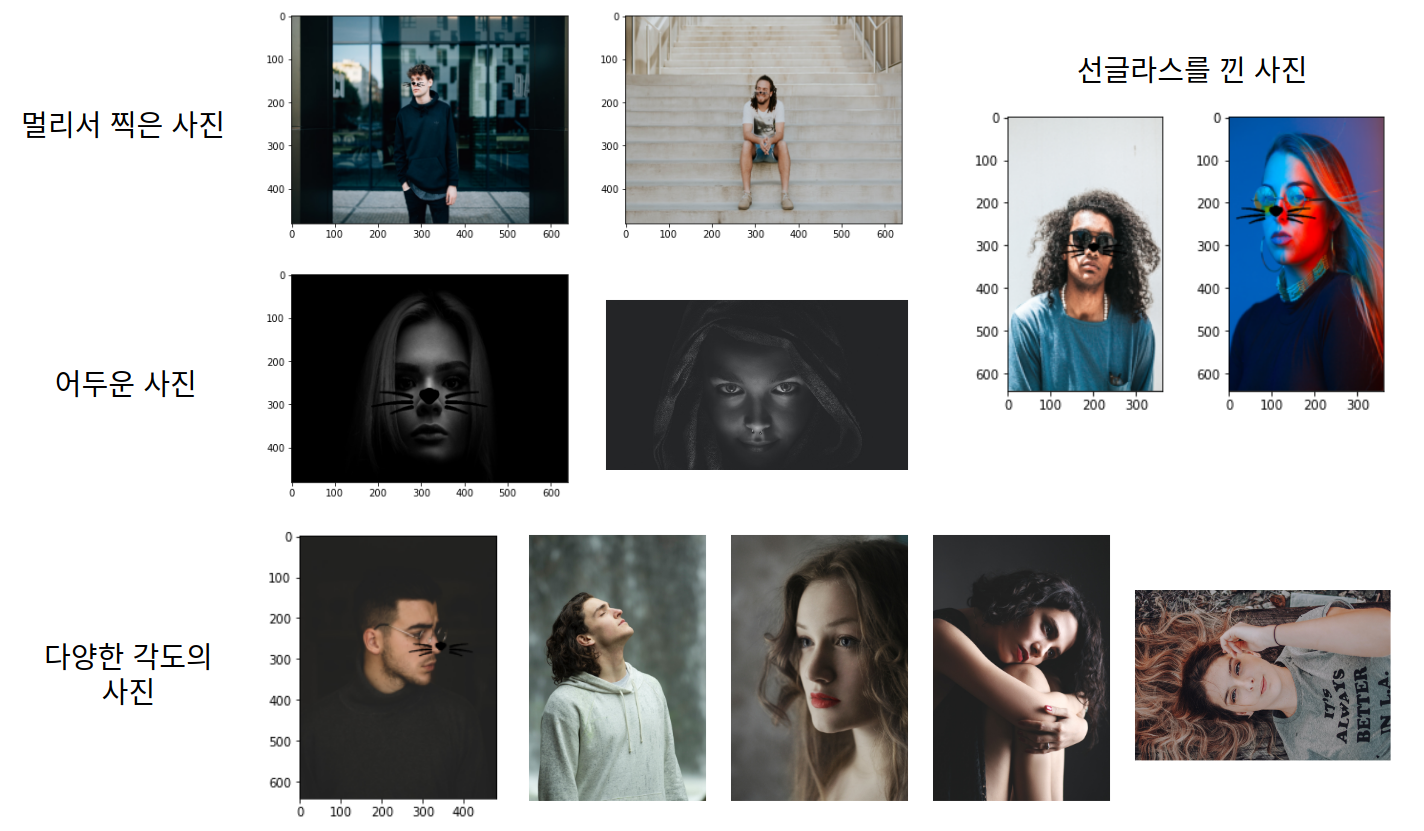

In [15]:
# 마크다운에 이미지를 삽입하고 싶은데 계속 오류가 나네요...
from IPython.display import Image
Image("/home/ssac21/aiffel/camera_sticker/images/Screenshot.png")